In [6]:
import os
import validators
from pathlib import Path
import urllib.request
import numpy as np
import math
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
def extract_kp_from_resource(f,person_id = -1):
    """
    Extract keypoints from resource (file or url) as a numpy vector
    """

    # load json from remote if it is an url; otherwise load as file
    if validators.url(f):
        json_temp = json.load(urllib.request.urlopen(u))['people']
    if Path(f).exists():
        json_temp = json.load(open(f))['people']
    
    try:
        # extract the keypoints of the person specified by person_id; default is last person identified
        keypoints = np.array(extract_kp_from_json(json_temp)["pose_keypoints_2d"][person_id]).astype('float')
    except:
        keypoints = np.empty((75,))
        keypoints[:] = np.NaN
    
    # set missing points (imputed as 0) to nan so that they are not plotted
    keypoints[keypoints==0] = np.nan
    
    return keypoints

In [8]:
def extract_kp_from_json(json_people):
    """
    subfunction for extract_kp_from_resource
    """
    person_id = []
    pose_keypoints_2d = []
    for i in range(0,len(json_people)):
        person_id.append(json_people[i]["person_id"])
        pose_keypoints_2d.append(json_people[i]["pose_keypoints_2d"])
    # return a dict
    return {'person_id': person_id, 'pose_keypoints_2d': pose_keypoints_2d}


In [9]:
def convert_kp_to_df(keypoints):
    """
    reshape keypoint vector to dataframe
    """
    # reshape to 25 X 3; the coordinates are x, y, confidence in estimate
    kin = keypoints.reshape((-1,3))
        
    # create a dataframe
    df = pd.DataFrame({'keypoint': ["Nose", "Neck", "RShoulder", "RElbow", "RWrist", "LShoulder", "LElbow", "LWrist", "MidHip", "RHip", "RKnee", "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", "RBigToe", "RSmallToe", "RHeel"], 'x': kin[:,0], 'y': kin[:,1], 'confidence': kin[:,2]})

    return df.set_index('keypoint')

In [10]:
def plot_body25_df(df):
    """
    plot a dataframe corresponding to body25 coordinates
    """
    segments = [['Neck', 'REar', 'LEar', 'Neck'],
        ['Nose', 'REye', 'LEye', 'Nose'],
        ['RShoulder', 'Neck', 'LShoulder','RShoulder'],
        ["LShoulder", "LElbow", "LWrist"],
        ["RShoulder", "RElbow", "RWrist"],
        ['RShoulder', 'RHip', 'LHip','LShoulder','RShoulder'],
        ['LHip', 'MidHip', 'RHip'],
        ["LHip", "LKnee", "LAnkle"],
        ["RHip", "RKnee", "RAnkle"],
        ['LAnkle', 'LHeel', 'LBigToe', 'LSmallToe', 'LAnkle'],
        ['RAnkle', 'RHeel', 'RBigToe', 'RSmallToe', 'RAnkle']]
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set(xlim=[0, 1920], ylim=[1080, 0], xlabel='X', ylabel='Y')
    [sns.lineplot(data=df.loc[s].reset_index(), x = "x", y = "y", ax = ax) for s in segments]
    plt.legend(labels=segments)


In [11]:
def extract_kp_from_file(f,person_id = -1):
    """
    Extract keypoints from resource (file or url) as a numpy vector
    """

    json_temp = json.load(open(f))['people']
    
    try:
        # extract the keypoints of the person specified by person_id; default is last person identified
        keypoints = np.array(extract_kp_from_json(json_temp)["pose_keypoints_2d"][person_id]).astype('float')
    except:
        keypoints = np.empty((75,))
        keypoints[:] = np.NaN
    
    # set missing points (imputed as 0) to nan so that they are not plotted
    keypoints[keypoints==0] = np.nan
    
    return keypoints


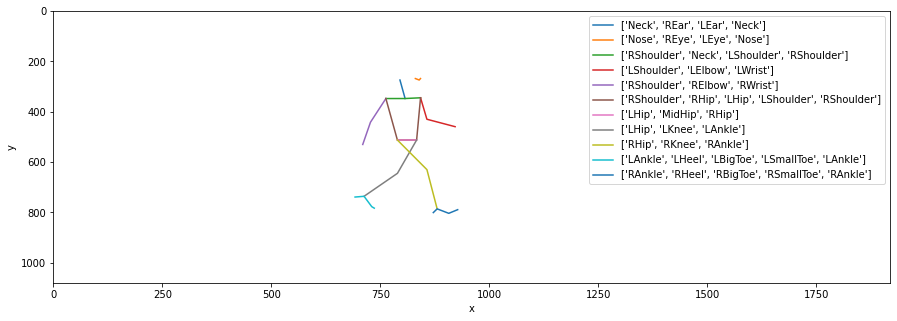

In [12]:
# u = "https://jlucasmckay.bmi.emory.edu/global/bmi500/keypoints.json"
# u = "OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis/output_json/Sina_dance_000000000000_keypoints.json"
u = "keypoints.json"
f = "keypoints.json"
# f = u

kp_u = extract_kp_from_resource(u)
kp_f = extract_kp_from_resource(f)

df_u = convert_kp_to_df(kp_u)
df_f = convert_kp_to_df(kp_f)

plot_body25_df(df_f)

In [13]:
df_f

,x,y,confidence
keypoint,,,
Nose,839.275,274.261,0.917512
Neck,806.930,347.775,0.878199
RShoulder,762.852,347.858,0.865138
RElbow,727.486,442.062,0.822156
RWrist,709.782,530.354,0.871983
LShoulder,842.340,344.855,0.844136
LElbow,856.942,430.125,0.889750
LWrist,921.665,459.668,0.859753
MidHip,809.972,512.606,0.826453


In [14]:
# Left knee angle
df_f.keys


<bound method NDFrame.keys of                  x        y  confidence
keypoint                               
Nose       839.275  274.261    0.917512
Neck       806.930  347.775    0.878199
RShoulder  762.852  347.858    0.865138
RElbow     727.486  442.062    0.822156
RWrist     709.782  530.354    0.871983
LShoulder  842.340  344.855    0.844136
LElbow     856.942  430.125    0.889750
LWrist     921.665  459.668    0.859753
MidHip     809.972  512.606    0.826453
RHip       789.240  512.631    0.785654
RKnee      857.011  630.380    0.887856
RAnkle     880.464  786.228    0.888342
LHip       833.368  512.616    0.799905
LKnee      789.408  644.940    0.890763
LAnkle     712.771  736.277    0.839424
REye       830.492  268.402    0.955732
LEye       842.256  268.353    0.814716
REar       795.156  274.314    0.857091
LEar           NaN      NaN         NaN
LBigToe    736.237  783.460    0.786820
LSmallToe  730.456  777.512    0.709043
LHeel      692.144  739.238    0.861732
RBigToe   

In [15]:
v1 = df_f.loc["LHip",['x','y']] - df_f.loc["LKnee",['x','y']]
v1

x     43.960
y   -132.324
dtype: float64

In [16]:
v2 = df_f.loc["LKnee",['x','y']] - df_f.loc["LAnkle",['x','y']]
v2

x    76.637
y   -91.337
dtype: float64

In [17]:
src_dir = Path("gait-json/json/")

In [18]:
src_dir.resolve()

PosixPath('/mnt/c/Users/sinad/OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis/gait-json/json')

In [19]:
src_dir.exists()

True

In [20]:
pwd

'/mnt/c/Users/sinad/OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis'

In [21]:
# Getting all the paths to json files
json_dir = src_dir
files = list(json_dir.glob("*/*.json"))

In [22]:
# Getting all of the trial informations
trial = [f.parent.stem for f in files]

In [23]:
# Getting all of the frame numbers
frame = [int(f.name.split("_")[1]) for f in files]

In [51]:
f = files[12]
# f = str(f.resolve())
# f = os.path.abspath(f)
f = f.resolve()
f

PosixPath('/mnt/c/Users/sinad/OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis/gait-json/json/1, 10-25, Normal gait, Sag, Paige/f_000000000012_keypoints.json')

In [54]:
f_open = open(f, 'r')
f_open

<_io.TextIOWrapper name='/mnt/c/Users/sinad/OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis/gait-json/json/1, 10-25, Normal gait, Sag, Paige/f_000000000012_keypoints.json' mode='r' encoding='UTF-8'>

In [56]:
json.load(f_open)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
json_temp = json.load(open(f))['people']
json_temp

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [28]:
kp_f = extract_kp_from_resource(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

pd.concat(outcomes_list...

trial.str.contains("normal")

# Homework

on windows command prompt:
navigate to : 
C:\Users\sinad\OneDrive - Georgia Institute of Technology\BMI 500 Bio Informatics\wk13\openpose

type the command: 

bin\OpenPoseDemo.exe --video .\examples\media\Sina_dance.mp4 --hand --write_json 'C:\Users\sinad\OneDrive - Georgia Institute of Technology\BMI 500 Bio Informatics\wk13\BMI500_HW13_Motion_Analysis\output_json'

In [29]:
# # Functions to calculate outcomes
# 
# To complete the lab, you must fill in the following function prototypes:
# 
# ```python
# def calculate_angle(v1,v2):
#     """
#     return the angle (in degrees) between two vectors v1 and v2.
#     """
#     
# ```
def calculate_angle(v1,v2):
    v1_norm = v1/np.linalg.norm(v1)
    v2_norm = v2/np.linalg.norm(v2)
    angle = np.arccos(np.dot(v1_norm,v2_norm))
    angle_degrees = 180 - np.round(math.degrees(angle),2)
    return angle_degrees

In [30]:
knee_angle = calculate_angle(v1, v2)
knee_angle

158.38

In [31]:
# def calc_outcomes(f):
#     """
#     calculate outcomes from a file or other resource
#     return as a dataframe in standard format
#     """
def calc_outcomes(f):
    kp_f = extract_kp_from_resource(f)
    df_f = convert_kp_to_df(kp_f)
    return df_f

In [32]:
df_f = df_f.loc[["RShoulder","RHip","RKnee","RAnkle", "RBigToe", "LShoulder","LHip","LKnee", "LAnkle","LBigToe"]]


In [33]:
toe = df_f.loc[["RBigToe","LBigToe"], ['y']].to_numpy()
toe

array([[789.415],
       [783.46 ]])

In [34]:
# def df_to_outcomes(d):
#     """
#     return a dataframe with kinematic outcomes derived from a single body25 dataframe.
#     """
#       
def df_to_outcomes(d):
    
    df_f = d.loc[["RShoulder","RHip","RKnee","RAnkle", "RBigToe", "LShoulder","LHip","LKnee", "LAnkle","LBigToe"]]
    
    #     right knee angle
    r_thigh_vector = df_f.loc["RHip",['x','y']] - df_f.loc["RKnee",['x','y']]
    r_shin_vector = df_f.loc["RKnee",['x','y']] - df_f.loc["RAnkle",['x','y']]
    r_knee_ang = calculate_angle(r_thigh_vector, r_shin_vector)
    
# Left knee angle
    l_thigh_vector = df_f.loc["LHip",['x','y']] - df_f.loc["LKnee",['x','y']]
    l_shin_vector = df_f.loc["LKnee",['x','y']] - df_f.loc["LAnkle",['x','y']]
    l_knee_ang = calculate_angle(l_thigh_vector, l_shin_vector)

# Right toe height
    r_toe = df_f.loc[["RBigToe"], ['y']].to_numpy()[0]
# Left toe height
    l_toe = df_f.loc[["LBigToe"], ['y']].to_numpy()[0]
# center of trunk segment x
    center_of_mass = (df_f.loc["RShoulder", ['x','y']] + df_f.loc["RHip", ['x','y']] + df_f.loc["LShoulder", ['x','y']] 
                       + df_f.loc["LHip", ['x','y']])/4
    center_of_mass_x = center_of_mass['x']
# center of truck segment y
    center_of_mass_y = center_of_mass['y']
    result ={'r_knee_ang': r_knee_ang, 'l_knee_ang':l_knee_ang, 
                              'r_toe_ht': r_toe, 'l_toe_ht': l_toe, 
                               'com_x':center_of_mass_x, 'com_y':center_of_mass_y }
    outcomes_df = pd.DataFrame(data=result)
    
    return outcomes_df

In [35]:
outcome = df_to_outcomes(df_f)
outcome

,r_knee_ang,l_knee_ang,r_toe_ht,l_toe_ht,com_x,com_y
0,158.64,158.38,789.415,783.46,806.95,429.49


In [36]:
files[0].parent.stem


'1, 10-25, Normal gait, Sag, Paige'

In [37]:
files = [f for f in src_dir.glob("*/*.json")]
f = str((files[1]).resolve())
f

'/mnt/c/Users/sinad/OneDrive - Georgia Institute of Technology/BMI 500 Bio Informatics/wk13/BMI500_HW13_Motion_Analysis/gait-json/json/1, 10-25, Normal gait, Sag, Paige/f_000000000001_keypoints.json'

In [38]:
kp_f = extract_kp_from_resource(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [39]:
calc_outcomes(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [40]:
# # Loop over files
# 
# Next, you must loop over files in the `json/` directory and concatenate all of the outcomes
# into a pandas dataframe called `outcomes`.
src_dir = Path("gait-json/json/")
files = [f for f in src_dir.glob("*/*.json")]
df_outcomes = pd.DataFrame()

for f in range(len(files)):
    # Getting all of the trial informations
    trial = files[f].parent.stem 
    # Getting all of the frame numbers
    frame = int(files[f].name.split("_")[1])
    df_f = calc_outcomes(os.fspath(files[f]))
    df = df_to_outcomes(df_f)
    df['trial']=trial
    df['frame']= frame
    df_outcomes = pd.concat([df_outcomes, df])
    
df_outcomes

JSONDecodeError: Expecting value: line 1 column 1 (char 0)


### Write to file
 
#### Write the data to a `csv` file


In [19]:
# write to file
# outcomes.to_csv("outcomes.csv",index=False)

In [20]:
# # Plot and save
# 
# ## Normal gait (right knee angle, first 200 frames)